# About

Here we investigate proportions of each particle type in different Monte Carlo simulated files for correct train/test preparation

In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt

In [3]:
import root_numpy
import numpy

In [4]:
from collections import Counter

In [5]:
%%time
template_path = "http://www.hep.phy.cam.ac.uk/~jonesc/lhcb/PID/ProtoParticlePIDtuples/MC/Sim09Devx/Reco15x/Dev03/ANNPID.{file_id}.root"
selection = "(TrackType==3) && (!HasMC || MCVertexType==1 || MCVertexType==2)"

counters = {}
for file_id in range(1, 500):
    fpath = template_path.format(file_id=file_id)
    particle_types = root_numpy.root2array(fpath, treename='ANNPID/DecayTree', branches=['MCParticleType'], selection=selection)['MCParticleType']
    counter = Counter(particle_types)
    counters[file_id] = counter
    print len(counters), 

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [6]:
import cPickle
import pandas

In [7]:
with open('pid_counters.pkl', 'w') as f:
    cPickle.dump(counters, f)

In [ ]:
# with open('pid_counters.pkl', 'r') as f:
#     counters = cPickle.load(f)

In [8]:
counters_df = pandas.DataFrame(counters.values(), index=counters.keys())

In [9]:
counters_df = counters_df.fillna(value=0)

In [10]:
only_important = counters_df.ix[:, counters_df.sum() > 1e5]

In [11]:
only_important

,-3222,-2212,-321,-211,-13,-11,0,11,13,211,321,2212,3222
1,61,15567,21022,141725,11745,722,60505,697,11645,144078,21413,16806,63
2,50,15242,34253,157664,2012,1274,70306,1202,1916,160096,35354,16245,68
3,369,79654,119324,786491,11555,7829,359377,7595,11633,797531,122572,86550,392
4,329,75874,131174,743472,61667,6022,337850,5788,61483,751164,135540,82212,336
5,335,74140,125984,754427,64392,6032,330935,6174,64527,754712,129141,78930,374
6,356,75638,121781,762595,61675,5858,340533,6038,61843,762807,125157,80710,350
7,344,79759,118973,798529,11756,7757,361525,7854,11880,797593,121690,85695,401
8,306,76139,120581,760789,60144,5993,343313,5889,60062,770891,123549,82320,323
9,332,79581,118196,780929,11464,7695,357993,7465,11389,791417,122293,85534,328
10,327,76873,133162,760387,64224,6055,344431,6135,64313,760308,136775,82668,412


## How many particles after all preselections in the files

In [12]:
only_important.sum(axis=0)

-3222       149520
-2212     34219830
-321      53135324
-211     341108695
-13       11046347
-11        3089902
 0       154149426
 11        3077321
 13       11040119
 211     343578363
 321      54614150
 2212     36852293
 3222       158247
dtype: int64

## Proportions of each particle type by file

In [13]:
particle_types = only_important.div(only_important.sum(axis=1), axis=0)
particle_types

,-3222,-2212,-321,-211,-13,-11,0,11,13,211,321,2212,3222
1,0.000137,0.034900,0.047129,0.317734,0.026331,0.001619,0.135647,0.001563,0.026107,0.323009,0.048006,0.037677,0.000141
2,0.000101,0.030750,0.069103,0.318075,0.004059,0.002570,0.141837,0.002425,0.003865,0.322981,0.071324,0.032773,0.000137
3,0.000154,0.033316,0.049908,0.328956,0.004833,0.003275,0.150312,0.003177,0.004866,0.333573,0.051267,0.036200,0.000164
4,0.000137,0.031708,0.054818,0.310698,0.025771,0.002517,0.141188,0.002419,0.025694,0.313912,0.056642,0.034356,0.000140
5,0.000140,0.031020,0.052711,0.315646,0.026941,0.002524,0.138461,0.002583,0.026998,0.315765,0.054032,0.033024,0.000156
6,0.000148,0.031446,0.050629,0.317042,0.025641,0.002435,0.141574,0.002510,0.025711,0.317131,0.052033,0.033554,0.000146
7,0.000143,0.033181,0.049495,0.332201,0.004891,0.003227,0.150400,0.003267,0.004942,0.331811,0.050625,0.035650,0.000167
8,0.000127,0.031589,0.050027,0.315641,0.024953,0.002486,0.142436,0.002443,0.024919,0.319832,0.051259,0.034153,0.000134
9,0.000140,0.033513,0.049775,0.328865,0.004828,0.003241,0.150758,0.003144,0.004796,0.333282,0.051500,0.036020,0.000138
10,0.000134,0.031556,0.054663,0.312137,0.026364,0.002486,0.141388,0.002518,0.026400,0.312104,0.056146,0.033935,0.000169


## The proportions plot in each file 

* for the particles with large number of corresponding tracks
* for the particles with small number of corresponding tracks

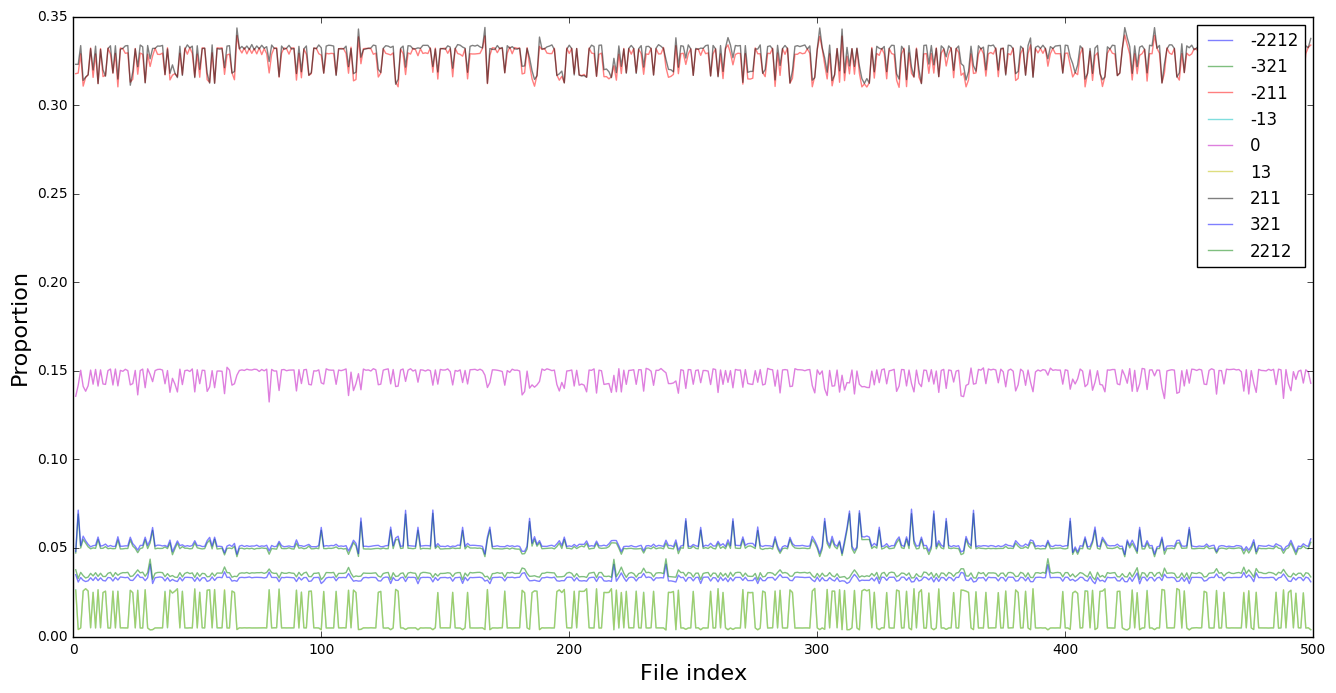

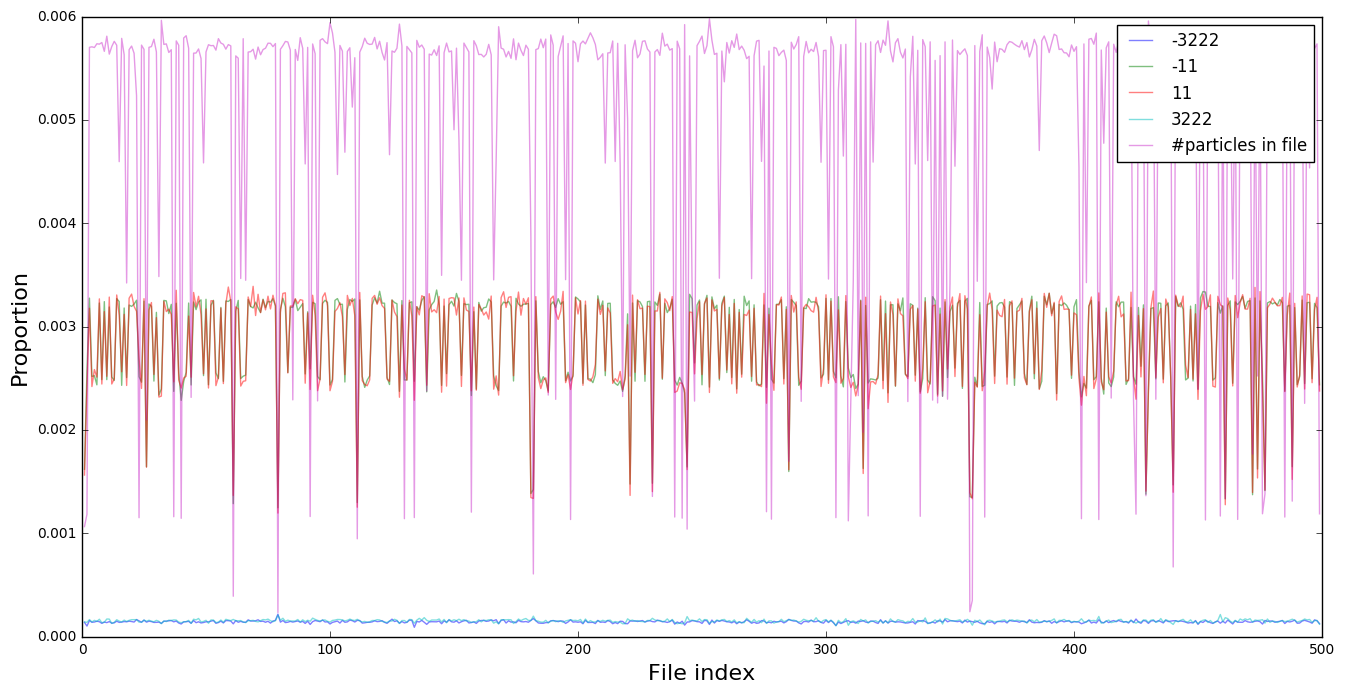

In [17]:
plt.figure(figsize=[16, 8])
for name, column in particle_types.iteritems():
    if only_important[name].sum() > 1e7:
        plt.plot(column, label=name, alpha=0.5) 
plt.legend()
plt.xlabel('File index', fontsize=16)
plt.ylabel('Proportion', fontsize=16)
plt.savefig('img/paper/files_proportions1.pdf', format='pdf')
plt.show()

plt.figure(figsize=[16, 8])
for name, column in particle_types.iteritems():
    if only_important[name].sum() < 1e7:
        plt.plot(column, label=name, alpha=0.5) 
        
# plotting number of particles in file
n_in_files = only_important.sum(axis=1)
plt.plot(n_in_files / numpy.mean(n_in_files) * 0.005, label='#particles in file', alpha=0.4 )
plt.xlabel('File index', fontsize=16)
plt.ylabel('Proportion', fontsize=16)
plt.legend()
plt.savefig('img/paper/files_proportions2.pdf', format='pdf')